
##Makine Öğrenimi Kullanarak Siber Saldırıları Tespit Etme
* Siber güvenliği iyileştirmek için, makine öğrenimi algoritmaları siber saldırıları tespit etmek için uygulanabilir.
* Yaklaşım, çeşitli değişkenler arasındaki ilişkileri tanımlayarak potansiyel saldırıları belirlemek için ağ verilerini analiz etmeyi içerir.
* Makine öğrenimi algoritmalarından yararlanarak, siber saldırı tespitinin doğruluğu ve verimliliği artırılabilir. Bu, dijital ağların ve sistemlerin güvenliğini artıracaktır.

## Siber Saldırı Verileri
* Veri, Yeni Güney Galler Üniversitesi'nin (Avustralya) Cyber Range Lab'sinde yakalanan ağ paketlerini içeriyor. Veri, UNSW Canberra'da yer alan Cyber Range Lab tarafından toplanmıştır. Veri, eğitim ve test verisi olmak üzere iki set halinde sunulmuştur.

* Veri seti dokuz farklı türde siber saldırıyı içerir, bunlar:

1. Fuzzers: Bir sisteme rasgele veri göndererek dayanıklılığını test etmek ve herhangi bir zayıflığı belirlemek için kullanılan saldırı türüdür.

2. Analysis: Sistemi analiz ederek zayıflıklarını ve potansiyel hedeflerini belirlemek için kullanılan bir saldırı türüdür.

3. Backdoors: Bir sisteme gizli bir giriş noktası oluşturarak daha sonra saldırgan tarafından kullanılmak üzere oluşturulan bir saldırı türüdür.

4. DoS (Denial of Service): Bir sistemin normal işleyişini bozmaya yönelik, kullanıcılarına erişimi engellemeyi amaçlayan bir saldırı türüdür.

5. Exploits: Bir sistemin bir zafiyetini kullanarak yetkisiz erişim veya kontrol elde etmeyi amaçlayan bir saldırı türüdür.

6. Generic: Diğer kategorilere uymayan çeşitli saldırı türlerini içeren genel bir kategoridir.

7. Reconnaissance: Bir hedef sistemi hakkında bilgi toplamayı içeren, potansiyel saldırı için hazırlık yapmak amacıyla kullanılan bir saldırı türüdür.

8. Shellcode: Bir hedef sisteme zararlı kodu, genellikle kabuk betikleri şeklinde, yürütmeyi amaçlayan bir saldırı türüdür.

9. Worms: Kendiliğinden diğer sistemlere yayılan, genellikle zarar veren bir kötü amaçlı yazılım türüdür.

* Bu dokuz kategori, bir sistemi kötüye kullanmak için kullanılabilecek geniş bir saldırı türlerini kapsar ve potansiyel güvenlik tehditlerine karşı korunmak için bunları bilmek önemlidir.

## Kütüphaneleri Yükleme

**nbformat metin, grafikler ve diğer medya öğelerini tek bir belgede birleştirmek için kullanılır.**

In [ ]:
!pip install nbformat

**Graphviz, grafikleri ve ağaç yapılarını oluşturmak ve görselleştirmek için kullanılan bir yazılım paketidir**

In [ ]:
!pip install graphviz

**dtreeviz, karar ağaçlarını daha anlaşılır ve etkili bir şekilde görselleştirmek için kullanılır.**

In [ ]:
!pip install dtreeviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 2.3 MB/s eta 0:00:00


**NumPy, Python'da bilimsel hesaplama için kullanılan temel bir kütüphanedir.
Pandas, veri manipülasyonu ve analizi için kullanılan etkili bir Python kütüphanesidir.
Matplotlib, Python'da çeşitli grafikler oluşturmak için kullanılan popüler bir çizim kütüphanesidir.
Seaborn, Matplotlib'e dayalı bir veri görselleştirme kütüphanesidir. Matplotlib'in temel işlevlerini genişleterek daha çekici ve bilgilendirici grafikler oluşturmayı sağlar
 Bu satır, Jupyter defterlerinde Matplotlib çizimlerinin doğrudan defter içinde görüntülenmesini sağlayan bir IPython sihirbazıdır**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_context('notebook')
sns.set_style('white')

import dtreeviz

## Veri Önişleme

**Eğitim veri seti (training) 82,332 satır ve 45 sütuna sahiptir.
Test veri seti (testing) ise 175,341 satır ve 45 sütuna sahiptir.**

In [ ]:
training = pd.read_csv("/content/UNSW_NB15_training-set.csv.zip")
testing = pd.read_csv("/content/UNSW_NB15_testing-set.csv.zip")
print("training ",training.shape)
print("testing ",testing.shape)

training  (82332, 45)
testing  (175341, 45)


**Her iki veri setindeki sütun isimlerinin aynı olup olmadığını kontrol eder**

In [ ]:
all(training.columns == testing.columns)

True

 **Eğitim ve test veri setleri (training ve testing) birleştirilerek tek bir veri çerçevesi oluşturuluyor.Daha sonrasında id sütunu bu veri setinden çıkarılıyor.
 İndeks sıfırdan başlayacak şekilde yeniden ayarlanır.**

In [ ]:
df = pd.concat([training,testing]).drop('id',axis=1)
df = df.reset_index(drop=True)

df.head(5)

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.000011,udp,-,INT,2,0,496,0,90909.0902,254,...,1,2,0,0,0,1,2,0,Normal,0
1,0.000008,udp,-,INT,2,0,1762,0,125000.0003,254,...,1,2,0,0,0,1,2,0,Normal,0
2,0.000005,udp,-,INT,2,0,1068,0,200000.0051,254,...,1,3,0,0,0,1,3,0,Normal,0
3,0.000006,udp,-,INT,2,0,900,0,166666.6608,254,...,1,3,0,0,0,2,3,0,Normal,0
4,0.000010,udp,-,INT,2,0,2126,0,100000.0025,254,...,1,3,0,0,0,2,3,0,Normal,0


1. id: Her bir kayda atanmış benzersiz bir kimlik numarası.
2. dur: Bağlantının süresi (saniye cinsinden). Bağlantının ne kadar sürdüğünü belirtir.
3. proto: İletişimde kullanılan protokol. Örneğin, TCP, UDP, ICMP gibi.
4. state: Bağlantı durumu. Örneğin, 'ACC' (Bağlantı Kuruldu), 'CLO' (Bağlantı Kapandı), 'FIN' (Fin Biti Gönderildi), 'REQ' (İstek Yapıldı), 'URP' (Acil veri alındı) gibi.
5. spkts: Kaynak (source) tarafından gönderilen paketlerin sayısı.
6. dpkts: Hedef (destination) tarafından gönderilen paketlerin sayısı.
7. sbytes: Kaynak tarafından gönderilen baytların sayısı.
8. dbytes: Hedef tarafından gönderilen baytların sayısı.
9. rate: Bağlantının veri iletim hızı (bayt/saniye).
10. sttl: Kaynak tarafından gönderilen paketlerin TTL (Time to Live) değeri.
11. dttl: Hedef tarafından gönderilen paketlerin TTL değeri.
12. sload: Kaynak tarafından üretilen yük (bps cinsinden).
13. dload: Hedef tarafından üretilen yük (bps cinsinden).
14. sloss: Kaynak tarafından kaybedilen paketlerin sayısı.
15. dloss: Hedef tarafından kaybedilen paketlerin sayısı.
16. sinpkt: Kaynak paketler arasındaki ortalama süre (saniye cinsinden).
17. dinpkt: Hedef paketler arasındaki ortalama süre (saniye cinsinden).
18. sjit: Kaynak zamanlama verisinin standart sapması.
19. djit: Hedef zamanlama verisinin standart sapması.
20. swin: Kaynak bağlantı penceresi boyutu.
21. stcpb: Kaynak TCP başlangıç sekans numarası.
22. dtcpb: Hedef TCP başlangıç sekans numarası.
23. dwin: Hedef bağlantı penceresi boyutu.
24. tcprtt: TCP el sıkışma zamanı.
25. synack: SYN-ACK el sıkışma zamanı.
26. ackdat: ACK veri el sıkışma zamanı.
27. smean: Kaynak paketlerin ortalama boyutu.
28. dmean: Hedef paketlerin ortalama boyutu.
29. trans_depth: HTTP trafiği için istemciden sunucuya gönderilen en derin istek paketinin derinliği.
30. response_body_len: Sunucudan alınan HTTP yanıt gövdesinin uzunluğu.
31. ct_srv_src: Hizmet kaynaklarına yapılan benzersiz bağlantı sayısı.
32. ct_state_ttl: Ağ durumunu değiştiren benzersiz TTL değerlerinin sayısı.
33. ct_dst_ltm: Hedefe yapılan son bağlantıdan bu zamana kadar yapılan benzersiz bağlantı sayısı.
34. ct_src_dport_ltm: Kaynak ve hedef bağlantı noktasına yapılan benzersiz bağlantı sayısı.
35. ct_dst_sport_ltm: Hedef ve kaynak bağlantı noktasına yapılan benzersiz bağlantı sayısı.
36. ct_dst_src_ltm: Hedef ve kaynak IP adresine yapılan benzersiz bağlantı sayısı.
37. is_ftp_login: FTP login başarısız olduysa 1, aksi takdirde 0.
38. ct_ftp_cmd: FTP komut sayısı.
39. ct_flw_http_mthd: HTTP yöntem sayısı.
40. ct_src_ltm: Kaynaktan yapılan benzersiz bağlantı sayısı.
41. ct_srv_dst: Servis hedeflerine yapılan benzersiz bağlantı sayısı.
42. is_sm_ips_ports: Kaynak ve hedef portlar IP türüne özgü mü? 1 ise evet, 0 ise hayır.
43. attack_cat: Saldırı kategorisi.
44. label: Saldırı mı yoksa normal mi olduğunu belirten etiket. Saldırı ise 1, normal ise 0.
45. service: Bağlantıda kullanılan servis türü veya port numarası. Örneğin, HTTP, FTP gibi

In [ ]:
df.columns

Index(['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

**Veri çerçevesinin genel yapısı hakkında bir özet sağlar. Eksik veya doğru olmayan veri tipleri gibi olası sorunları belirlemek için kullanışlıdır**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257673 entries, 0 to 257672
Data columns (total 44 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dur                257673 non-null  float64
 1   proto              257673 non-null  object 
 2   service            257673 non-null  object 
 3   state              257673 non-null  object 
 4   spkts              257673 non-null  int64  
 5   dpkts              257673 non-null  int64  
 6   sbytes             257673 non-null  int64  
 7   dbytes             257673 non-null  int64  
 8   rate               257673 non-null  float64
 9   sttl               257673 non-null  int64  
 10  dttl               257673 non-null  int64  
 11  sload              257673 non-null  float64
 12  dload              257673 non-null  float64
 13  sloss              257673 non-null  int64  
 14  dloss              257673 non-null  int64  
 15  sinpkt             257673 non-null  float64
 16  di

 'attack_cat' sütununda bulunan benzersiz değerleri döndürür. 'attack_cat', saldırı türlerini temsil eden bir sütundur. Bu ifade, veri çerçevesinde bulunan farklı saldırı türlerini listeleyerek, veri setinde hangi tür saldırıların bulunduğunu anlamamızı sağlar.

In [ ]:
df.attack_cat.unique()

array(['Normal', 'Reconnaissance', 'Backdoor', 'DoS', 'Exploits',
       'Analysis', 'Fuzzers', 'Worms', 'Shellcode', 'Generic'],
      dtype=object)

## Verilerin Kategorilendirilmesi

Label Encoding (Etiket Kodlama): Bu yöntemde, her kategoriye benzersiz bir sayı atanır. Bu yöntem, sıralı kategorik veriler için uygundur. Örneğin, 'küçük', 'orta', 'büyük' gibi kategorileri sırasıyla 0, 1, 2 gibi sayılarla temsil edebilirsiniz.

One-Hot Encoding (Tek-Kodlama): Bu yöntemde, her kategori yeni bir ikili özellik (dummy variable) olacak şekilde genişletilir. Her kategori, varsa 1, yoksa 0 ile temsil edilir. Bu yöntem, nominal (sırasız) kategorik veriler için uygundur.

 'proto', 'service', 'state' sütunlarını kategorik bir veri türüne dönüştürür ve ardından kategorik kodlamayı (label encoding) uygular

In [ ]:
for col in ['proto', 'service', 'state']:
    df[col] = df[col].astype('category').cat.codes

df['attack_cat'] = df['attack_cat'].astype('category')

Burada proto service state sütünlarına sayısal değerler verildi

In [ ]:
df.head(5)

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.000011,119,0,5,2,0,496,0,90909.0902,254,...,1,2,0,0,0,1,2,0,Normal,0
1,0.000008,119,0,5,2,0,1762,0,125000.0003,254,...,1,2,0,0,0,1,2,0,Normal,0
2,0.000005,119,0,5,2,0,1068,0,200000.0051,254,...,1,3,0,0,0,1,3,0,Normal,0
3,0.000006,119,0,5,2,0,900,0,166666.6608,254,...,1,3,0,0,0,2,3,0,Normal,0
4,0.000010,119,0,5,2,0,2126,0,100000.0025,254,...,1,3,0,0,0,2,3,0,Normal,0


## Saldırı kategorilerinin görselleştirilmesi

'label' sütunu 1 olan örneklerin 'attack_cat' sütunundaki saldırı kategorilerinin sayısı hesaplanır.
Ve saldırıların ne kadar tekrarlandığı hesaplanır.
explode=[0,0,0,0,0,0.2,0.2,0.2,0.2,1.2]: Pasta dilimlerinin patlatılma derecesini belirtir. 0 değeri patlamayı olmamasını, sıfırdan farklı bir değer dilimin patlatılmasını sağlar. Patlatma, ilgili dilimin merkezden ne kadar uzaklaştırılacağını belirtir. Bu, vurgulanmak istenen dilimler için kullanışlıdır.

attack_cat
Generic           58871
Exploits          44525
Fuzzers           24246
DoS               16353
Reconnaissance    13987
Analysis           2677
Backdoor           2329
Shellcode          1511
Worms               174
Normal                0
Name: count, dtype: int64


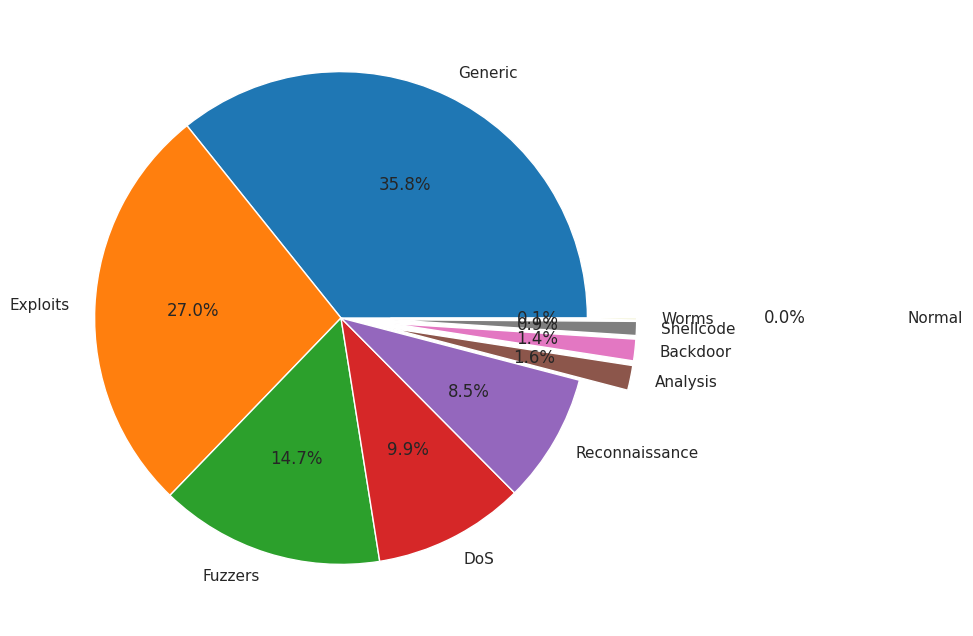

In [ ]:
validAttacks = df[df['label']==1]['attack_cat'].value_counts()
print(validAttacks)

plt.figure(figsize = (15,8))
plt.pie(validAttacks,labels = validAttacks.index, autopct = '%1.1f%%',explode = [0,0,0,0,0,0.2,0.2,0.2,0.2,1.2])
plt.show()

* Generic and Exploits attacks are the most.

## Veri Bölme



*  Bağımsız değişkenlerin (X) belirlenmesi. 'attack_cat' ve 'label' sütunları çıkarılarak, geriye kalan sütunlar bağımsız değişkenleri oluşturur.
*    Bağımlı değişkenin (y) belirlenmesi. 'label' sütunu, hedef değişkeni (etiketleri) temsil eder
* Veri setinin eğitim ve test alt kümelerine ayrılması. test_size parametresi, test setinin oranını belirtir (bu örnekte %30 olarak belirlenmiştir).
*random_state parametresi, veri setinin bölünmesi sırasında rasgele durumun kontrol edilmesini sağlar.
*veri setini eğitim ve test alt kümelerine böler ve ardından her bir alt kümenin boyutunu yazdırır. Bu, modelin eğitim ve test için uygun şekilde hazırlanmasını sağlar.
*feature_names = list(X.columns): Bağımsız değişkenlerin (X) sütun isimlerinin alınması
*print("X_train shape: ", X_train.shape): Eğitim setinin boyutunun yazdırılması.
*print("y_train shape: ", y_train.shape): Eğitim setinin etiketlerinin boyutunun yazdırılması.
*print("X_test shape: ", X_test.shape): Test setinin boyutunun yazdırılması.
*print("y_test shape: ", y_test.shape): Test setinin etiketlerinin boyutunun yazdırılması.



In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns = ['attack_cat', 'label'])
y = df['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

feature_names = list(X.columns)

print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (180371, 42)
y_train shape:  (180371,)
X_test shape:  (77302, 42)
y_test shape:  (77302,)


## Decision Tree Model :
* Siber saldırıları tespit etmek için bir dizi kriter oluşturmak için bir karar ağacı modeli kullanılacak. Modeli en yüksek hatırlama oranını maksimize etmeye yönlendirmek için bir ızgara arama gerçekleştirilecek. İlk koruma katmanını oluşturmak için hatırlama oranının yüksek olması gerekmektedir.

* 'Best parameters': {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}: En iyi parametre kombinasyonu, ızgara arama işlemi sonucunda bulunan ve modelin en iyi performansını sağlayan parametre değerlerini içerir. Bu durumda, 'criterion' için 'gini', 'max_depth' için 2, 'min_samples_leaf' için 1 ve 'min_samples_split' için 2 değerleri en iyi sonucu vermiştir.
* En iyi hatırlama skoru, en iyi parametre kombinasyonuyla elde edilen  recall değeridir.**Recall, modelin gerçekte pozitif olan örneklerin ne kadarını doğru bir şekilde tanımladığını ölçer.** Bu değer, 1.0 olarak gösterilmiştir, yani 100% hatırlama sağlanmıştır. Bu, modelin eğitim veri kümesindeki tüm pozitif örnekleri doğru bir şekilde sınıflandırdığı anlamına gelir. Bu, modelin belirli bir düzeyde doğruluğa ve güvenilirliğe sahip olduğunu gösterir.
*5 kat çapraz doğrulama(cross validation) kullanılır. Bunu 10 yapsak 10 parçaya bölüp bir bölümü test diğer bölümleri eğitim olarak ölçeklendirilecekti.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2]
}

dt = DecisionTreeClassifier()

grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best recall score:", grid_search.best_score_)

Best parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best recall score: 1.0


* clf.fit=En iyi modeli eğitim veri kümesi üzerinde eğitir. Bu, modelin belirtilen parametrelerle eğitilmesini ve veriye uyarlanmasını sağlar.
* y_pred = clf.predict-> modelin test veri kümesindeki örneklerin sınıflarını tahmin etmesini sağlar.
* recall = recall_score(y_test, y_pred): Gerçek sınıflarla (y_test) tahmin edilen sınıflar arasında hatırlama skorunu hesaplar. Hatırlama, gerçekte pozitif olan örneklerin ne kadarını doğru bir şekilde tanımlandığını ölçer. Bu, modelin ne kadar iyi saldırıları tespit ettiğini gösterir.


In [ ]:
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

clf=grid_search.best_estimator_
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

recall = recall_score(y_test, y_pred)
print("Recall: ", recall)

Recall:  1.0


* Modelin test veri kümesindeki gerçek pozitiflerin tamamını doğru bir şekilde tespit ettiği anlamına gelir. Yani, model, test veri kümesindeki tüm saldırıları başarıyla tanımlamıştır.

## Kuralların Görselleştirilmesi

Karar ağacının tüm düğümlerinde hangi özelliklerin hangi değerlerde bölündüğünü ve sonuç olarak hangi sınıfların tahmin edildiğini metin formatında gösterir.

:::::::> The RULES FOR HIGH RECALL RATE <::::::: 
 |--- sttl <= 61.00
|   |--- sinpkt <= 0.00
|   |   |--- class: 1
|   |--- sinpkt >  0.00
|   |   |--- class: 0
|--- sttl >  61.00
|   |--- synack <= 0.04
|   |   |--- class: 1
|   |--- synack >  0.04
|   |   |--- class: 1



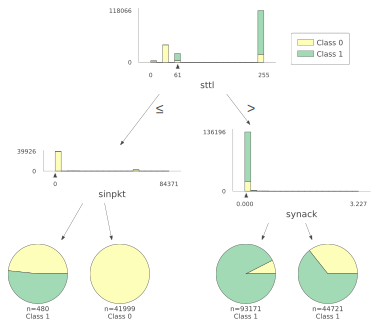

In [ ]:
from sklearn.tree import export_text
import dtreeviz

print(":::::::> The RULES FOR HIGH RECALL RATE <::::::: \n" ,export_text(clf,feature_names=feature_names))

viz_model = dtreeviz.model(clf,
                           X_train=X_train, y_train=y_train,
                           feature_names=feature_names)
viz_model.view()

* Karar ağacından, ağacın kuralını 'sttl<=61' ve 'sttl>61' olarak görselleştirdildi.
* 'sttl' değeri ağ trafiğinde paketlerin kaynaktan hedefe giderken sahip olduğu yaşam süresini belirten bir parametredir ve ağ analizinde kritik bir rol oynar.
* sttl Değeri:
sttl <= 61.00 olduğunda:
sinpkt <= 0.00 ise, veri sınıf 1 olarak etiketlenir.
sinpkt > 0.00 ise, veri sınıf 0 olarak etiketlenir.
sttl > 61.00 olduğunda:
synack <= 0.04 ise, veri sınıf 1 olarak etiketlenir.
synack > 0.04 ise, veri yine sınıf 1 olarak etiketle

## Potansiyel saldırıları tespit etmek için veri filtreleme

In [ ]:
X_test = X_test.reset_index(drop=True)

rules= "(sttl <= 61.00 & sinpkt<= 0.00) | (sttl >  61.00 )"

ind = X_test.query(rules).index

X_test_2 = X_test.loc[ind,:]
y_test_2 = y_test[ind]

print(X_test.shape)
print(X_test_2.shape)
print("filtered data" , (1- np.round(X_test_2.shape[0] / X_test.shape[0],2))*100, "%")

(77302, 42)
(59425, 42)
filtered data 23.0 %


* Kurallara dayalı sistem, ağ trafiğinin %23'ünü daha detaylı analiz için filtreledi, bu da tehdit olmayan ağ etkinliğini tespit etmedeki etkinliğini göstermektedir. Şimdi, eğitilmiş modeli filtrelenmiş test verilerine uygulayarak siber saldırıları tespit edeceğiz.

X_train shape:  (180371, 42)
y_train shape:  (180371,)
X_test_2 shape:  (59425, 42)
y_test_2 shape:  (59425,)
y_pred:  [1 1 1 1 1 0 1 1 1 1]
Recall:  0.949139185257032
Precision:  0.9510224741850577
Accuracy:  0.9169373159444678


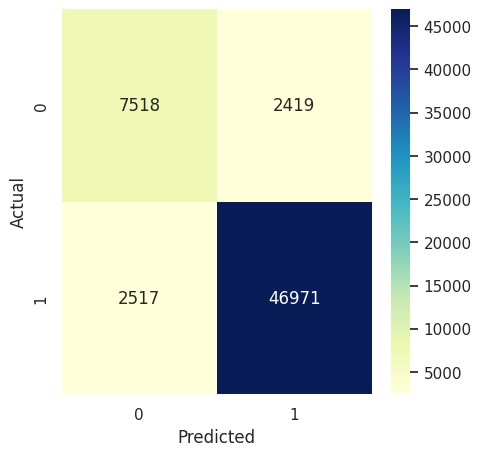

Evaluation Results: {'Recall': 0.949139185257032}


In [ ]:

from sklearn.metrics import accuracy_score, precision_score, recall_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def model_evaluation(model):
    # Modeli eğit
    model.fit(X_train, y_train)

    # Tahmin yap
    y_pred = model.predict(X_test_2)

    # İlk 10 tahmini yazdır
    print("y_pred: ", y_pred[:10])

    # Performans metriklerini hesapla
    accuracy = accuracy_score(y_test_2, y_pred)
    recall = recall_score(y_test_2, y_pred)
    precision = precision_score(y_test_2, y_pred)

    # Performans metriklerini yazdır
    print("Recall: ", recall)
    print("Precision: ", precision)
    print("Accuracy: ", accuracy)

    # Çapraz tablo oluştur ve ısı haritası çiz
    cross = pd.crosstab(pd.Series(y_test_2, name='Actual'), pd.Series(y_pred, name='Predicted'))
    plt.figure(figsize=(5, 5))
    sns.heatmap(cross, annot=True, fmt='d', cmap="YlGnBu")
    plt.show()

    return {'Recall': recall}

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

# Veri setlerinin doğru şekilde tanımlandığından emin olun
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test_2 shape: ", X_test_2.shape)
print("y_test_2 shape: ", y_test_2.shape)

# Fonksiyonu çağır ve model değerlendirmesini yap
results = model_evaluation(model)

# Sonuçları kontrol edin
print("Evaluation Results:", results)

#Recall (Duyarlılık): Gerçek pozitiflerin (True Positives) toplam pozitifler içindeki oranını ifade eder.
#Precision (Kesinlik): Doğru pozitiflerin (True Positives) toplam tahmin edilen pozitifler içindeki oranını ifade eder.
#Accuracy (Doğruluk): Tüm doğru tahmin edilen örneklerin toplam örnek sayısına oranını ifade eder


## Random Forest Model

y_pred:  [0 1 1 1 1 0 1 1 1 1]
Recall:  0.9571815389589395
Precision:  0.9647257693326001
Accuracy:  0.9351956247370635


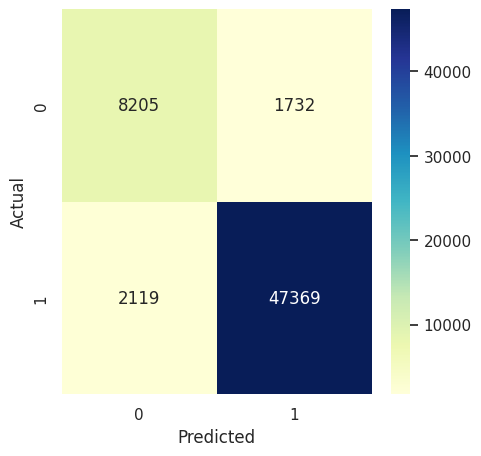

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=11)

results['Random Forest Model'] = model_evaluation(rf)

## Ağaçta bulunan kuralların görselleştirilmesi

Random Forest modelinin içerisindeki belirli bir karar ağacını metin formatında görüntülemek için kullanılır. Bu, karar ağacının nasıl çalıştığını ve hangi özelliklerin hangi değerlerde dallandığını anlamak için faydalıdır.

In [ ]:
from sklearn.tree import export_text
feature_names = list(X.columns)

print(export_text(rf.estimators_[99],feature_names=feature_names))

|--- dpkts <= 0.50
|   |--- ct_srv_src <= 2.50
|   |   |--- sbytes <= 53.00
|   |   |   |--- sinpkt <= 30000.02
|   |   |   |   |--- sbytes <= 26.00
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- sbytes >  26.00
|   |   |   |   |   |--- class: 0.0
|   |   |   |--- sinpkt >  30000.02
|   |   |   |   |--- class: 0.0
|   |   |--- sbytes >  53.00
|   |   |   |--- rate <= 0.11
|   |   |   |   |--- sbytes <= 62.50
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- sbytes >  62.50
|   |   |   |   |   |--- sttl <= 143.00
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- sttl >  143.00
|   |   |   |   |   |   |--- ct_src_dport_ltm <= 1.50
|   |   |   |   |   |   |   |--- sinpkt <= 5037.05
|   |   |   |   |   |   |   |   |--- ct_srv_dst <= 1.50
|   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |   |--- ct_srv_dst >  1.50
|   |   |   |   |   |   |   |   |   |--- sbytes <= 803.00
|   |   |   |   |   |   |   |   |   |   |--- class: 0.0
| 

* XGBoost, regresyon, sınıflandırma ve sıralama görevlerinde kullanılabilir.
* Özellikleri:Hız ve Verimlilik,Yüksek Performans,Esneklik açısından avantajlar sunar.
* XGBoost içinde olan başka kütüphaneler:
* XGBRegressor:Regresyon görevlerinde kullanılır. Örneğin, ev fiyatı tahmini, stok fiyatı tahmini.
* XGBRanker:Sıralama problemlerinde kullanılır. Örneğin, arama motoru sonuç sıralaması, öneri sistemleri.
* XGBClassifier sınıflandırma modeli oluşturur ve bu modelin performansını değerlendirir.

y_pred:  [0 1 1 1 1 0 1 1 1 1]
Recall:  0.9517458777885548
Precision:  0.9657774405872583
Accuracy:  0.931729070256626


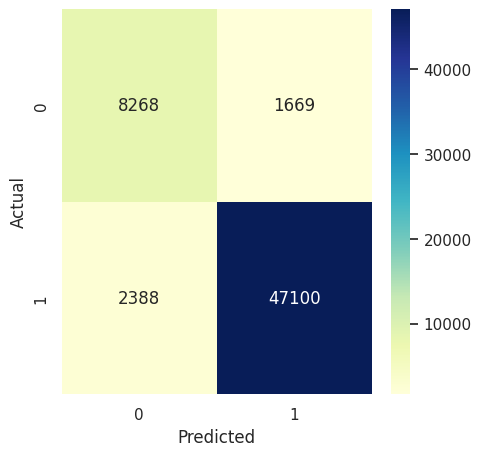

In [ ]:
from xgboost import XGBClassifier

xgbc = XGBClassifier()

results['XGBoost Classifier'] = model_evaluation(xgbc)

dtreeviz karar ağacının nasıl çalıştığını ve örneklerin nasıl sınıflandırıldığını anlamak için oldukça faydalıdır.

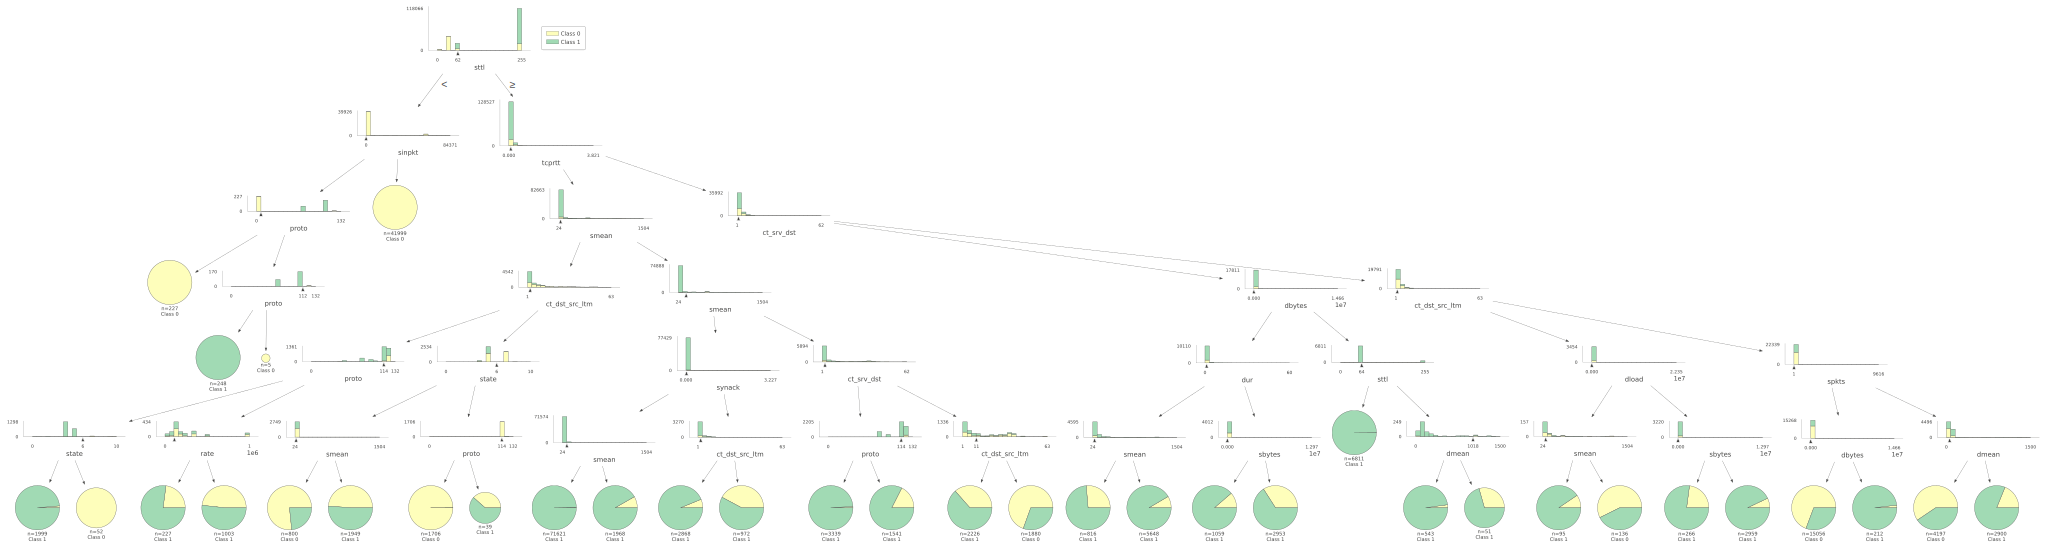

In [ ]:
viz_model = dtreeviz.model(xgbc,tree_index=1,
                           X_train=X_train, y_train=y_train,
                           feature_names=feature_names)
viz_model.view()

LightGBM sınıflandırıcı modelini kullanarak model değerlendirmesi yapar
Model, test veri setindeki örneklerin çoğunu doğru bir şekilde sınıflandırmış

[LightGBM] [Info] Number of positive: 115185, number of negative: 65186
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.049749 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6184
[LightGBM] [Info] Number of data points in the train set: 180371, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.638600 -> initscore=0.569295
[LightGBM] [Info] Start training from score 0.569295
y_pred:  [0 1 1 1 1 0 1 1 1 1]
Recall:  0.9465122858066602
Precision:  0.964898547739211
Accuracy:  0.9267816575515355


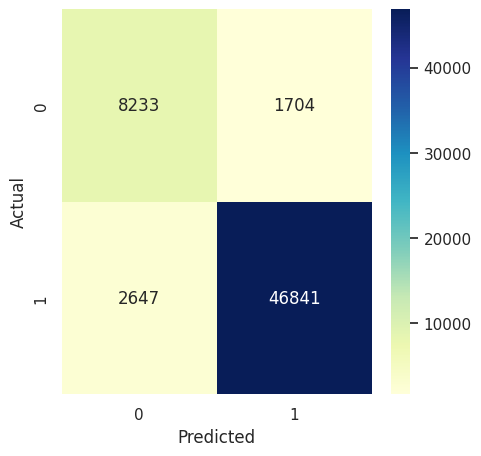

In [ ]:
from lightgbm import LGBMClassifier

lgbc = LGBMClassifier()

results['Light GBM Classifier'] = model_evaluation(lgbc)

* LightGBM ve XGBoost (eXtreme Gradient Boosting) arasında birkaç önemli fark:
1. LightGBM, büyük veri kümelerinde eğitim için optimize edilmiş ve genellikle daha hızlıdır.
2. XGBoost genellikle daha fazla bellek kullanır.
3. LightGBM, kategorik özellikleri doğrudan destekler ve bu özellikleri model eğitimi sürecine dahil edebilir.
4. XGBoost, kategorik özellikleri doğrudan desteklemez, bu nedenle bu tür özelliklerin işlenmesi için ön işleme gerektirebilir
* Genel olarak, LightGBM ve XGBoost benzer temel fikirleri paylaşır ve Gradient Boosting türündeki makine öğrenimi algoritmalarıdır.

Gradient Boosting'in temel fikri, bir öğreniciyi eğitip tahmin yaparak elde edilen hataların (artıkların) bir sonraki öğreniciyi eğitmek için kullanılmasıdır. Her bir öğrenici, önceki öğrenicilerin artıklarını (hataları) azaltmaya çalışarak modelin genel performansını artırır.

LightGBM modelinin karar ağacını çizer. Bu fonksiyon, ağacın görselleştirilmiş bir görüntüsünü oluşturur.

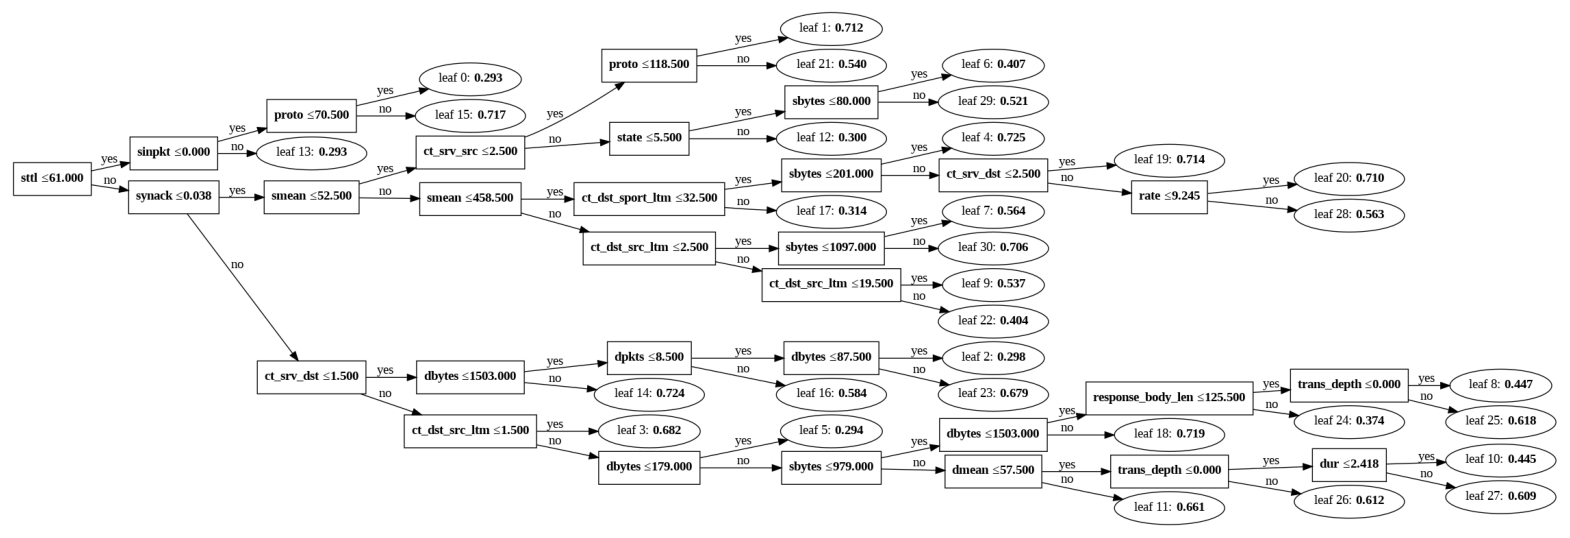

In [ ]:
import lightgbm

lightgbm.plot_tree(lgbc,figsize = (20,12))
plt.show()

Model performanslarını görsel olarak karşılaştırmak ve farklı modeller arasında hangisinin daha iyi performans gösterdiğini belirlemek için kullanılabilir

In [ ]:
comparision = pd.DataFrame(results)
comparision

,Recall,Random Forest Model,XGBoost Classifier,Light GBM Classifier
Recall,0.949119,0.957182,0.951746,0.946512


##Hipotez testi:
####Wilcoxon sıralama toplam testi:
* Wilcoxon sıralama toplam testi, verilerin normal dağıldığını varsaymayan, yani parametrik olmayan bir testtir. Wilcoxon sıralama toplam testi bir Z istatistiği ve bir p-değeri hesaplayacaktır. Z istatistiği, üç geri çağrı puanı arasındaki varyasyonun ne kadar olduğunu ölçer. p-değeri, gözlemlenen sonuç kadar aşırı bir sonuç almanın olasılığını ölçer, eğer null hipotez doğruysa. Null hipotez, üç modelin geri çağrısında fark olmadığı hipotezidir. Eğer p-değeri 0.05'ten küçükse, o zaman null hipotezi reddedebiliriz ve üç modelin geri çağrısı arasında istatistiksel olarak anlamlı bir fark olduğunu sonuçlandırabiliriz.

In [ ]:
from scipy.stats import wilcoxon

z_statistic, p_value = wilcoxon([comparision.iloc[0][0], comparision.iloc[0][1], comparision.iloc[0][2]]
                                )# üç modelin geri çağırma performansını içeren bir listeyi parametre olarak alır.

# Wilcoxon sıralama toplam testi sonucunda elde edilen Z istatistiği ve p-değeri ile doldurulur
print('Z-statistic:', z_statistic)
print('p-value:', p_value)

# elde edilen p-değeri 0.05'ten küçükse, üç model arasındaki geri çağırma performansı arasındaki farkın istatistiksel
# olarak anlamlı olduğu sonucuna varılır .Aksi takdirde, farkın istatistiksel olarak anlamlı olmadığı sonucuna varılır
if p_value < 0.05:
    print('The difference in the recall of the three models is statistically significant.')
else:
    print('The difference in the recall of the three models is not statistically significant.')


Z-statistic: 0.0
p-value: 0.25
The difference in the recall of the three models is not statistically significant.


üç model arasındaki geri çağırma performansı üzerinde bir karşılaştırma yapar ve bu karşılaştırmanın istatistiksel olarak anlamlı olup olmadığını değerlendirir.

* Sonuç olarak, veriler üzerinde yapılan test, üç model arasındaki geri çağırma performansı arasında istatistiksel olarak anlamlı bir fark olmadığını göstermektedir.
* Üç modelden herhangi biri, siber saldırıları tahmin etmek için önemli özellikleri belirlemek için uygulanabilir.

## Korelasyonlar
* Siber saldırı tespitinde yer alan değişkenlerin anlaşılmasını iyileştirmek için ağ verilerini analiz etmemiz gerekiyor. Korelasyon diyagramları, farklı değişkenlerin birbirleriyle ve siber saldırılarla nasıl ilişkili olduğunu görselleştirmekte yardımcı olabilir. Ayrıca, rastgele orman modelleri, farklı özelliklerin hedef değişkeni (siber saldırılar) tahmin etmedeki önemini belirlemeye yardımcı olabilir. Rastgele ormandaki özellik sıralamalarını korelasyon analizi sonuçları ile karşılaştırarak, etkili bir siber saldırı tespiti için odaklanılması gereken ana özellikleri daha iyi anlayabiliriz.







* Korelasyon matrisi, değişkenler arasındaki ilişkiyi anlamak için kullanılır.
* Isı haritası, değişkenler arasındaki ilişkiyi anlamak için güçlü bir araçtır. Korelasyon matrisindeki değerleri ve renkleri inceleyerek, veri setinizdeki değişkenler arasındaki ilişkiyi anlayabilir ve analizinizi yönlendirebilir

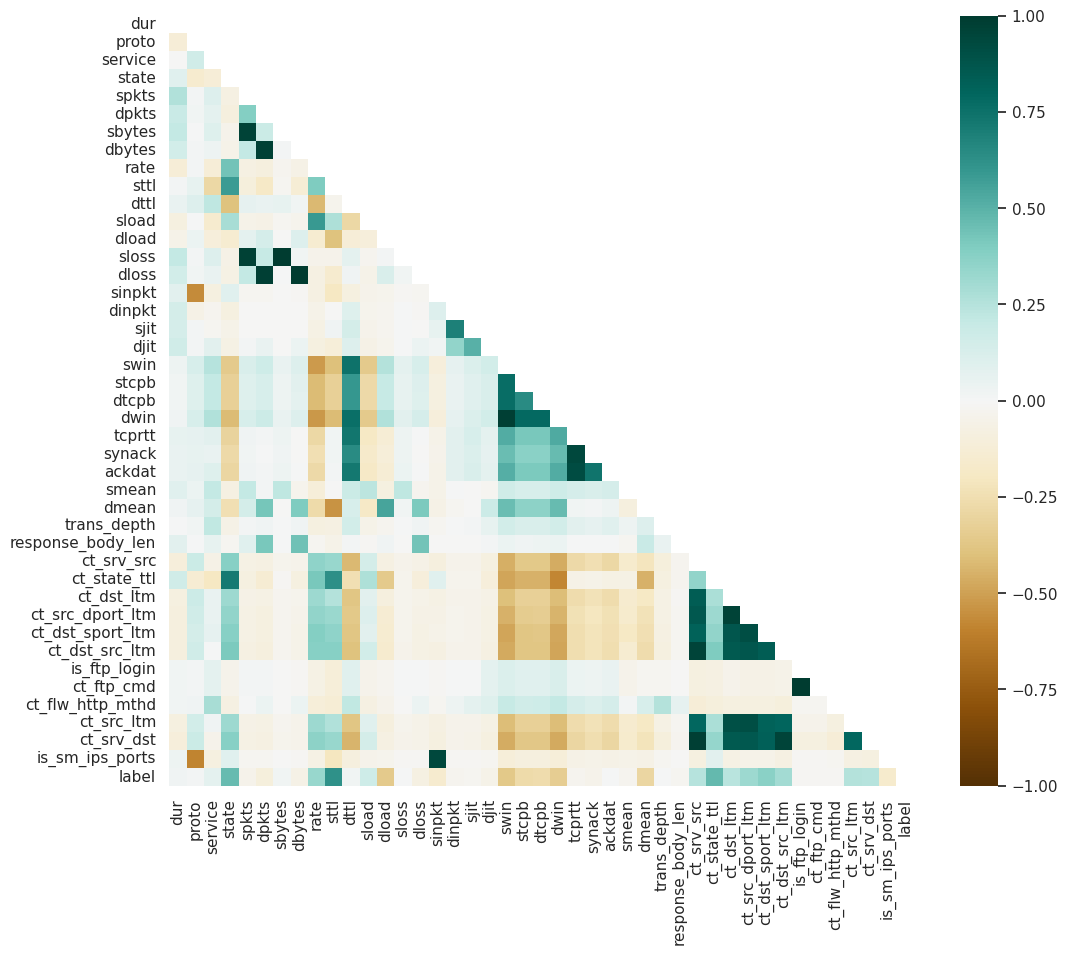

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sayısal sütunları seçin
numeric_df = df.select_dtypes(include=[np.number])

# Korelasyon matrisini hesaplayın
corr_matrix = numeric_df.corr()

# Üçgen maske oluşturun
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Isı haritasını çizdirin
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, cmap='BrBG', mask=mask)
plt.show()

 Her bir hücre, iki değişken arasındaki korelasyon katsayısını temsil eder. Değerler genellikle -1 ile 1 arasındadır. Pozitif değerler pozitif bir ilişkiyi, negatif değerler ise negatif bir ilişkiyi gösterir. Değer ne kadar yakınsa, ilişki o kadar güçlüdür.

### Değişkenlerin siber saldırı (etiket) ile olan korelasyonu

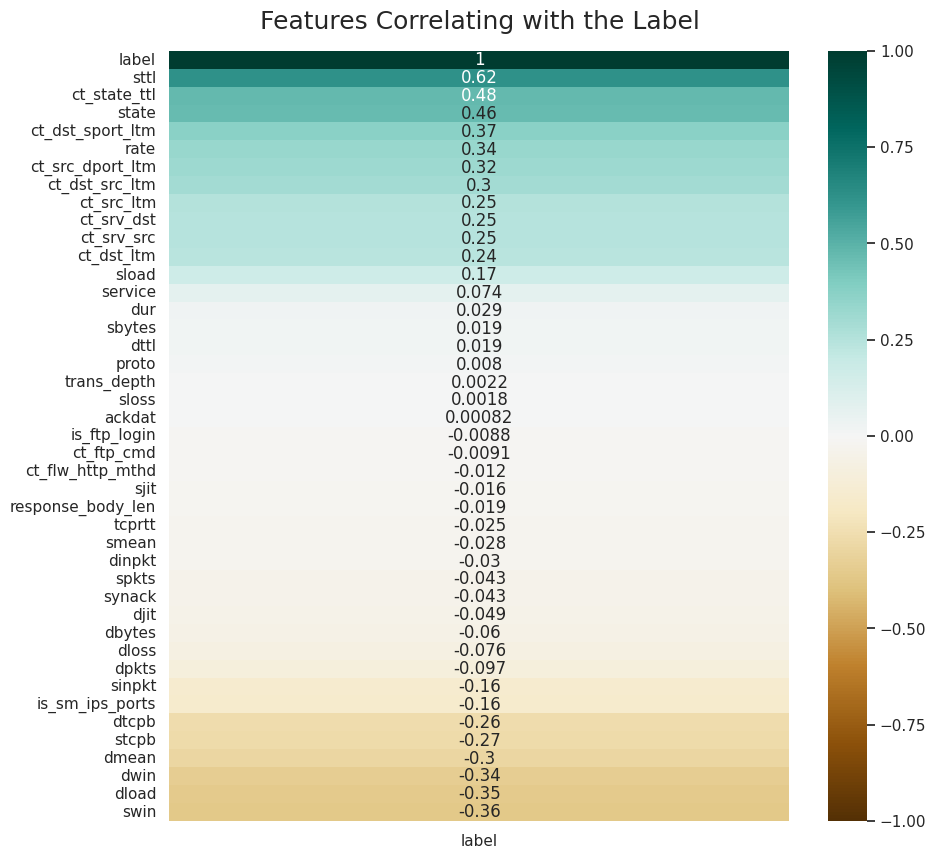

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Veri çerçevenizde sadece sayısal sütunları seçin
numeric_df = df.select_dtypes(include=[np.number])

# 'label' sütununun veri çerçevesinde bulunduğunu ve sayısal olduğunu kontrol edin
if 'label' in numeric_df.columns:
    plt.figure(figsize=(10, 10))

    # Korelasyon matrisini hesaplayın ve 'label' ile korelasyonları alın
    corr_with_label = numeric_df.corr()[['label']].sort_values(by='label', ascending=False)

    # Isı haritasını çizdirin
    heatmap = sns.heatmap(corr_with_label, vmin=-1, vmax=1, annot=True, cmap='BrBG')
    heatmap.set_title('Features Correlating with the Label', fontdict={'fontsize':18}, pad=16)
    plt.show()
else:
    print("Veri çerçevesinde 'label' sütunu bulunamadı veya sayısal değil.")

####Aşağıdaki değişkenler siber saldırılarla pozitif yönlü olarak korele edilmiştir:

* sttl: Kaynaktan hedefe yaşam süresi değeri.
* ct_state_ttl ve state: Bu özellikler, TCP bağlantılarının çeşitli aşamalarını yansıtır ve port taraması, SYN seli veya DDoS saldırıları ile ilişkili olabilir.
* ct_dst_sport_ltm: Bu özellik, aynı kaynak IP'den aynı hedef bağlantı noktasına kısa bir süre içinde yapılan bağlantıların sayısını ölçer.
* rate: Bu özellik çeşitli trafik oranlarını veya frekanslarını temsil edebilir.
####Aşağıdaki değişkenler siber saldırılarla negatif yönlü olarak korele edilmiştir:

* swin :Kaynak bağlantı penceresi boyutu.
* dload

## Random Forest ile Özellik Sıralaması

modelin hangi özelliklere daha fazla önem verdiğini anlamamızı sağlar

In [ ]:
feature_imp = pd.DataFrame({'Name':X.columns, 'Importance':rf.feature_importances_})#özelliklerin modeldeki önem derecelerini alır.

feature_imp = feature_imp.sort_values('Importance',ascending=False).reset_index(drop=True)#önem derecesine göre özellikleri azalan sırada sıralar.

feature_imp[:10].style.background_gradient()#en önemli 10 özelliği alır

,Name,Importance
0,sttl,0.127183
1,ct_state_ttl,0.098745
2,rate,0.056321
3,dload,0.049838
4,sload,0.045773
5,sbytes,0.043195
6,ct_srv_dst,0.040537
7,smean,0.039754
8,ct_dst_src_ltm,0.038934
9,tcprtt,0.033016


1. sttl ->ağ paketlerinin ne kadar süre boyunca hedefe ulaşmaya çalıştığını gösterir
2. ct_state_ttl ->TCP bağlantılarının farklı aşamalarını ve TTL değerlerini gösterir.
3. rate-> çeşitli trafik oranlarını veya sıklıklarını temsil eder.

9. tcprtt ->ağ üzerinden veri paketlerinin gidip gelme süresini ölçer.

en önemli 20 özelliği görselleştirerek hangi özelliklerin model tarafından en kritik olarak değerlendirildiğini kolayca anlamamıza olanak tanır.

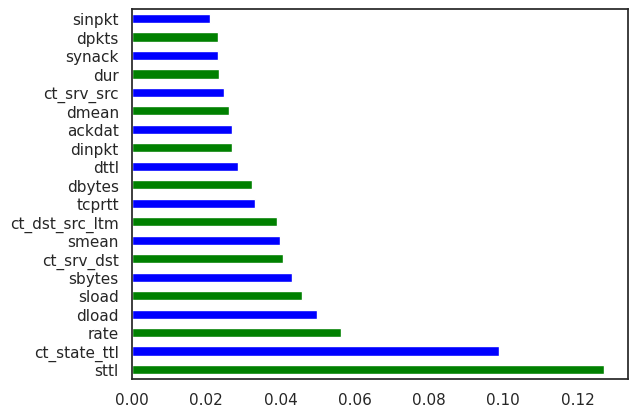

In [ ]:
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)#andom Forest modelinin her bir özelliğin önemini hesaplar
feat_importances.nlargest(20).plot(kind='barh',color=['g','b']*5)#Özellik önemlerinin en büyük 20 tanesini seçer
plt.show()

hangi özelliklerin cyber saldırıları tahmin etmekte daha fazla bilgi sağladığını anlayabilir ve bu bilgileri kullanarak güvenlik önlemlerini iyileştirebilirsiniz.

### En iyi 10 özelliği seçelim ve bu özelliklerin siber saldırı türüyle olan ilişkilerini bulalım.


In [ ]:
top10= feature_imp.Name[:10].tolist()
top10

['sttl',
 'ct_state_ttl',
 'rate',
 'dload',
 'sload',
 'sbytes',
 'ct_srv_dst',
 'smean',
 'ct_dst_src_ltm',
 'tcprtt']

veri setindeki en önemli 10 özelliği kullanarak bir Random Forest modeli oluşturur, eğitir ve test eder. Elde edilen doğruluk değeri, modelin performansını değerlendirmek için kullanılır.

In [ ]:
X = df[top10]
y = df['label'].values

rf_top10 = RandomForestClassifier(random_state=11)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

rf_top10.fit(X_train, y_train)

y_pred = rf_top10.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)


Accuracy:  0.9443869498848672


en önemli 10 özelliği kullanarak bir Karar Ağacı modelini eğitir ve bu modeli kullanarak sınıflandırmayı görselleştirir. Bu görselleştirme, modelin nasıl kararlar verdiğini ve hangi özelliklerin sınıflandırmada önemli olduğunu anlamak için yararlıdır.

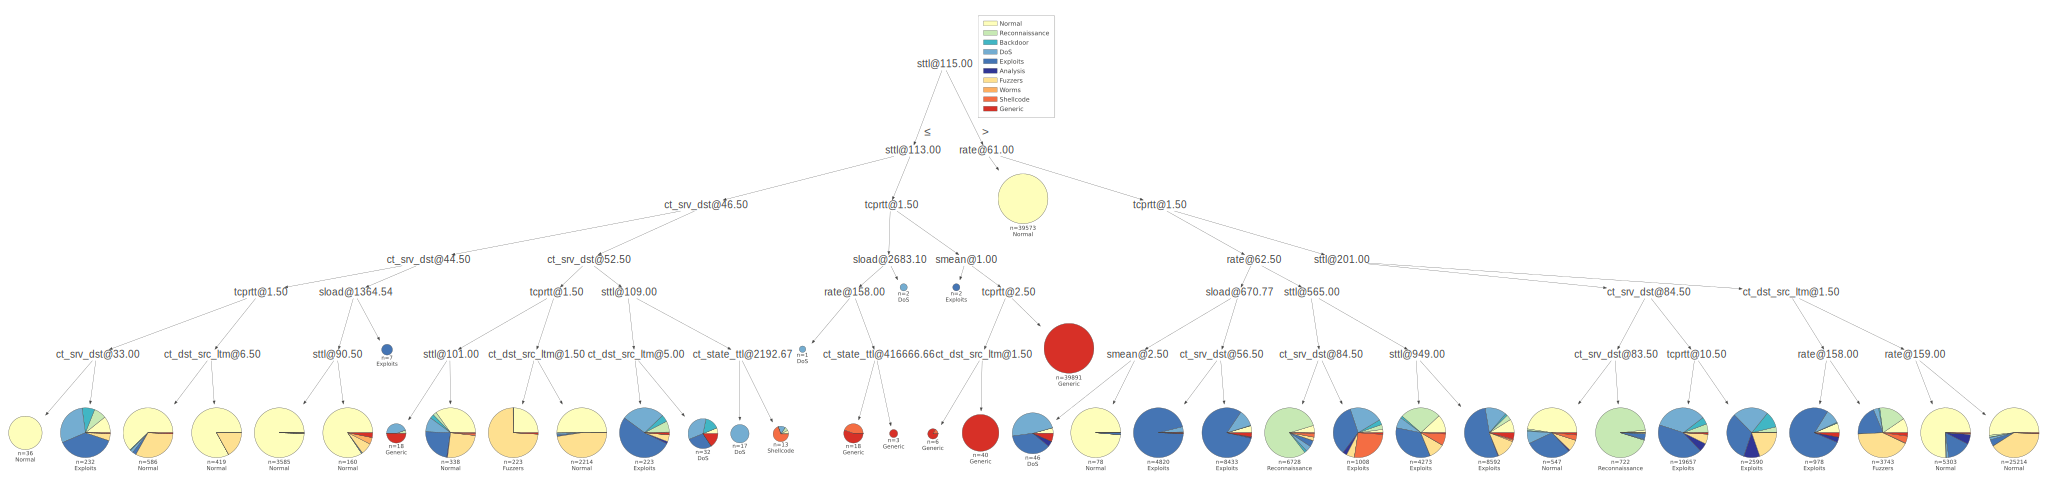

In [ ]:

top10= feature_imp.Name[:10].tolist()

attack_names = np.array(df['attack_cat'].unique())

X_top = df.loc[:, df.columns.isin(top10)]
y_top = pd.factorize(df['attack_cat'])[0]


clf_top10 = DecisionTreeClassifier(max_depth=6)

X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(X_top, y_top, test_size=0.3, random_state=11)

clf_top10.fit(X_train_top, y_train_top)

viz_model = dtreeviz.model(clf_top10,
                           X_train=X_train_top, y_train=y_train_top,
                           class_names=attack_names,
                           feature_names=top10)

viz_model.view(fancy=False,scale=1)

## Tahmin Etiketleri Olarak Saldırı Kategorisi ile Random Forest


modelin performansını değerlendirmek ve hangi sınıfların doğru veya yanlış tahmin edildiğini analiz etmek için kullanılır.

Accuracy:  0.8243253732115599


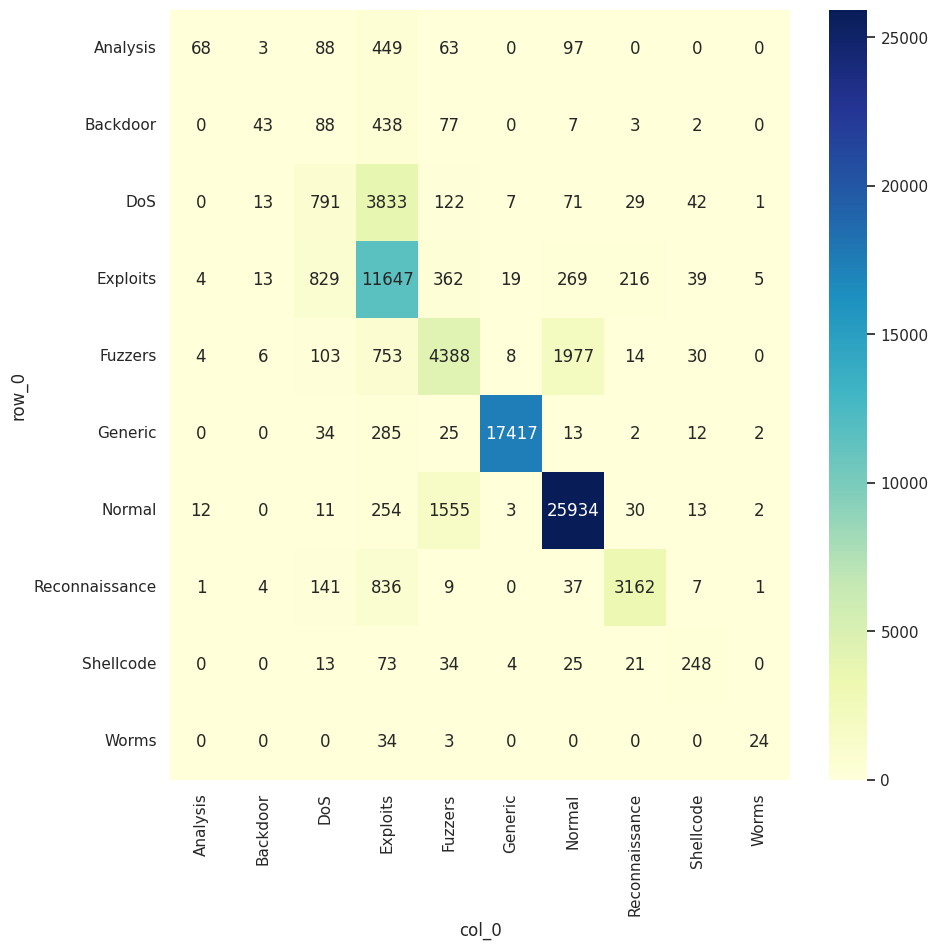

In [ ]:
top10= feature_imp.Name[:10].tolist()

X = df.loc[:, df.columns.isin(top10)]

y = df['attack_cat'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

rf = RandomForestClassifier(random_state=11,min_samples_leaf= 1, min_samples_split= 5, n_estimators= 100)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

cross = pd.crosstab(y_test,  y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(cross, annot=True,fmt='d', cmap="YlGnBu")
plt.show()


modelin her bir sınıf için hassasiyet (precision), duyarlılık (recall) ve F1 skoru gibi önemli performans metriklerini sunar.
1. modelin her bir sınıf için hassasiyet (precision), duyarlılık (recall) ve F1 skoru gibi önemli performans metriklerini sunar.
2. Duyarlılık (Recall): Duyarlılık, gerçek pozitif örneklerin ne kadarının doğru bir şekilde tahmin edildiğini gösterir.
3. F1 Skoru: F1 skoru, hassasiyet ve duyarlılığın harmonik ortalamasıdır.
4. Destek (Support): Destek, her bir sınıf için gerçekten bulunan örneklerin sayısını belirtir

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

                precision    recall  f1-score   support

      Analysis       0.76      0.09      0.16       768
      Backdoor       0.52      0.07      0.12       658
           DoS       0.38      0.16      0.23      4909
      Exploits       0.63      0.87      0.73     13403
       Fuzzers       0.66      0.60      0.63      7283
       Generic       1.00      0.98      0.99     17790
        Normal       0.91      0.93      0.92     27814
Reconnaissance       0.91      0.75      0.82      4198
     Shellcode       0.63      0.59      0.61       418
         Worms       0.69      0.39      0.50        61

      accuracy                           0.82     77302
     macro avg       0.71      0.54      0.57     77302
  weighted avg       0.82      0.82      0.81     77302



* "Generic", "Normal" ve "Exploits" saldırıları yüksek duyarlılığa sahiptir.*italik metin*

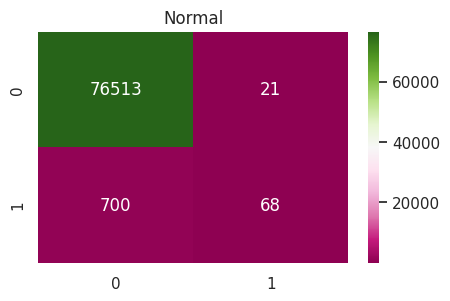

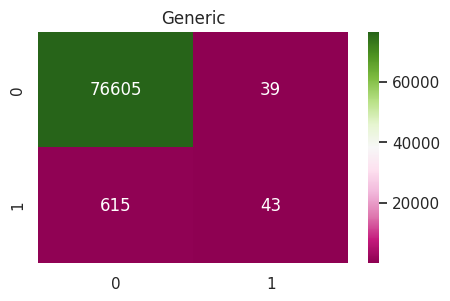

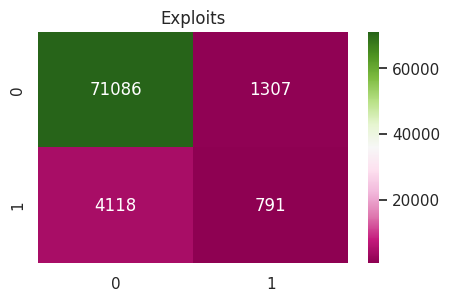

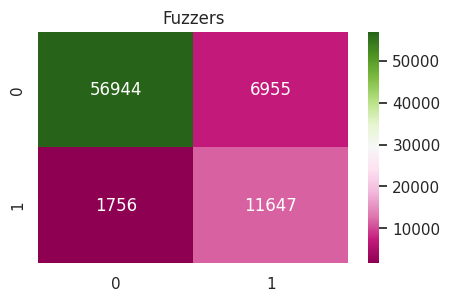

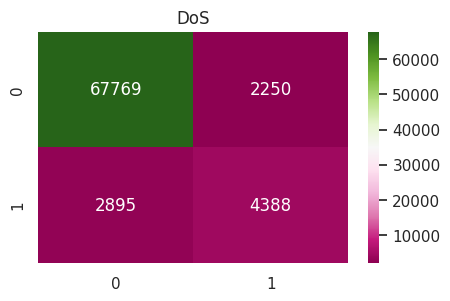

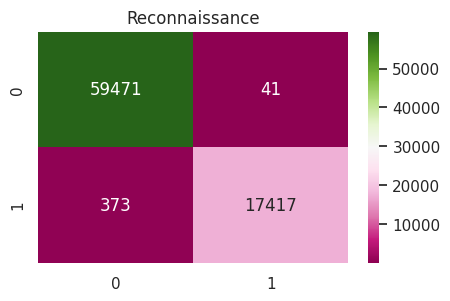

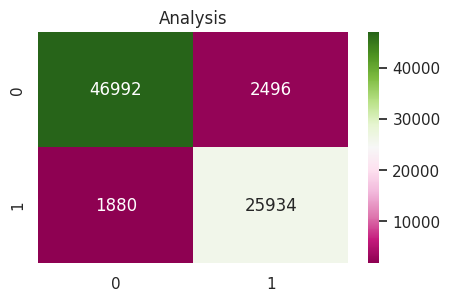

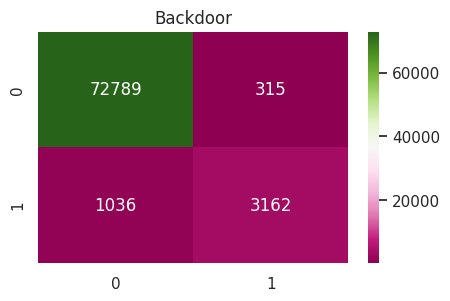

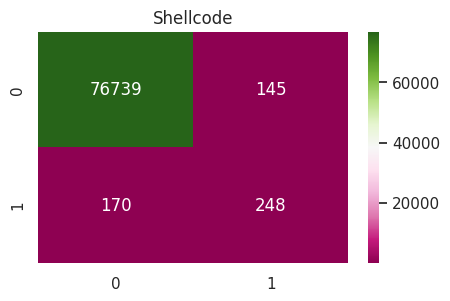

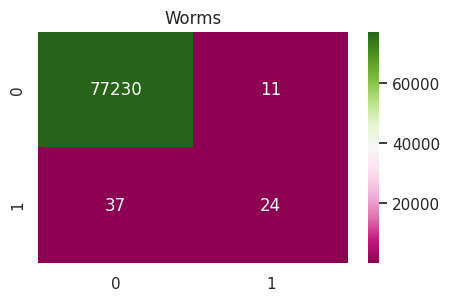

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
mcm = multilabel_confusion_matrix(y_test,y_pred)
for i,j in zip(mcm,df['attack_cat'].value_counts().index):
    plt.subplots(figsize = (5,3))
    sns.heatmap(i,annot=True,fmt = 'd',cmap = "PiYG")
    plt.title(j)

#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score


# Verileri eğitim ve test setlerine ayırın
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

# KNN modelini oluşturun (örneğin, k=5)
knn = KNeighborsClassifier(n_neighbors=5)

# Modeli eğitin
knn.fit(X_train, y_train)

# Test seti üzerinde tahmin yapın
y_pred = knn.predict(X_test)

# Model performansını değerlendirin
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


Accuracy: 0.8505213319189672
Precision: 0.8668355801404174
Recall: 0.9056336889751051


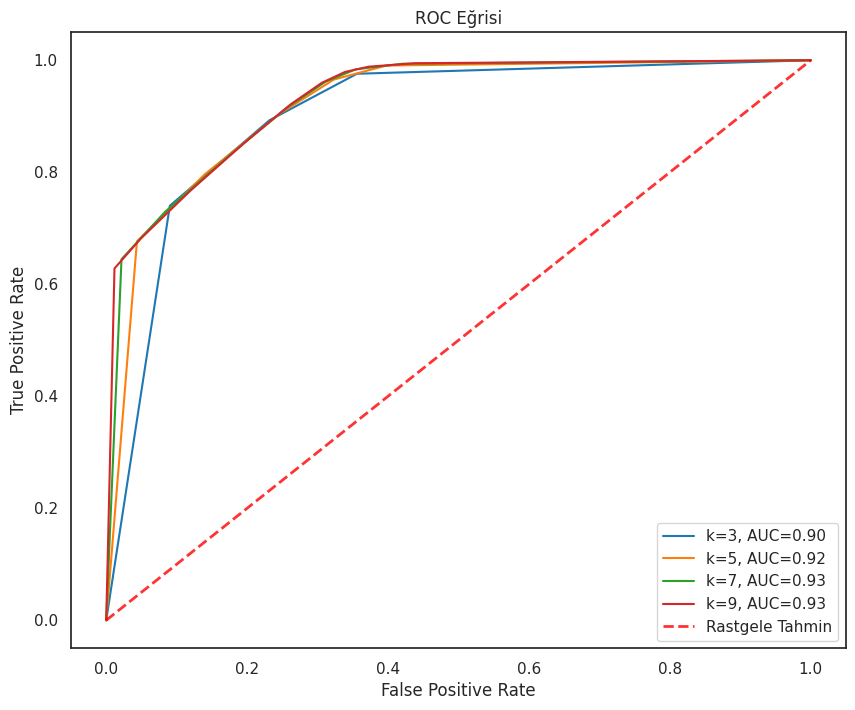

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# K değerlerini belirleyin
k_values = [3, 5, 7, 9]

# Her bir K değeri için ROC eğrisini çizin
plt.figure(figsize=(10, 8))
for k in k_values:
    # KNN modelini oluşturun
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Sınıflama olasılıklarını alın
    y_scores = knn.predict_proba(X_test)[:,1]

    # ROC eğrisini hesaplayın
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)

    # ROC eğrisini çizin
    plt.plot(fpr, tpr, label=f'k={k}, AUC={roc_auc:.2f}')

# Rastgele tahmin eden bir modelin ROC eğrisini çizin (baseline)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Rastgele Tahmin', alpha=.8)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Eğrisi')
plt.legend(loc="lower right")
plt.show()


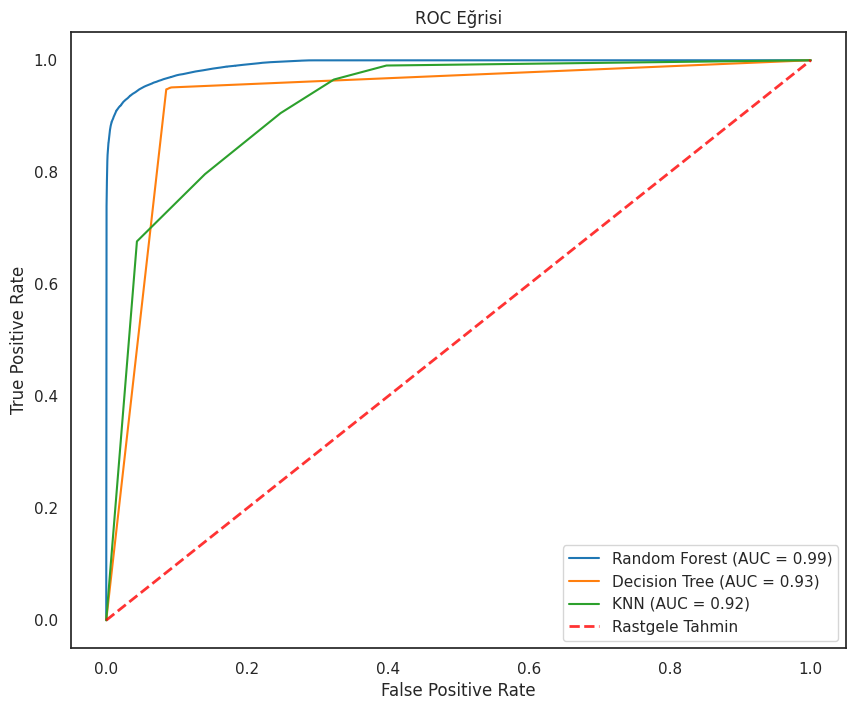

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Modelleri oluşturun
rf = RandomForestClassifier(random_state=11)
dt = DecisionTreeClassifier(random_state=11)
knn = KNeighborsClassifier()

models = {'Random Forest': rf, 'Decision Tree': dt, 'KNN': knn}

plt.figure(figsize=(10, 8))

# Her bir model için ROC eğrisini çizin
for model_name, model in models.items():
    model.fit(X_train, y_train)
    if model_name == 'KNN':
        y_scores = model.predict_proba(X_test)[:,1]
    else:
        y_scores = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Rastgele tahmin eden bir modelin ROC eğrisini çizin (baseline)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Rastgele Tahmin', alpha=.8)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Eğrisi')
plt.legend(loc="lower right")
plt.show()


## Sonuç
1. Rastgele Orman Modeli, siber saldırı tespiti için en iyisidir.
2. Karar Ağacı Modeli, siber saldırı tespit kurallarını belirlemek için kullanıldı.
3. Bu analizden, siber saldırı tespitinde önemli rol oynayan en önemli özellikler belirlendi.
4. Rastgele Orman Modeli, bağımlı değişken olan etiketle ve saldırı kategorisiyle de yüksek doğrulukla çalışmaktadır.